<a href="https://colab.research.google.com/github/AdrZx/ADS2002-fyan0039/blob/main/W6_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
abalone = pd.read_csv("abalone.csv")
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
dummy = pd.get_dummies(abalone['Sex'])
abalone = pd.concat([abalone, dummy], axis=1)
abalone.drop(columns=['Sex'], inplace=True)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [ ]:
Xf = abalone.drop(columns=['Rings'])
Yf = abalone[['Rings']]

X = Xf.copy()
X['Height'] = X['Height'].sample(frac=0.67)
X['Shell weight'] = X['Shell weight'].sample(frac=0.75)

X.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
count,4177.000000,4177.000000,2799.000000,4177.000000,4177.000000,4177.000000,3133.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139886,0.828742,0.359367,0.180594,0.236642,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.042606,0.490389,0.221963,0.109614,0.136991,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.229500,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.324500,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000


Exercise 1

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.impute import KNNImputer

abalone_knnn = X.describe()
Xf = abalone.drop(columns=['Rings'])
Yf = abalone[['Rings']]
Xm = X.mean()
Xs = X.std()
X = (X-X.mean())/X.std()
neighbors=10

Xt = KNNImputer(n_neighbors=10).fit_transform(X)

In [ ]:
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=0)
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
acc = r2_score(Y_test,Y_pred)

print('Testing score is %5.3f' % acc)

Testing score is 0.564


Exercise 2

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

abalone_ii = abalone.copy()
X = abalone_ii.iloc[:,0:8]
Xm = X.mean()
Xs = X.std()
X = (X-X.mean())/X.std()
Xt = IterativeImputer(max_iter=20, random_state=0).fit_transform(X)
abalone_ii.iloc[:,0:8] = Xt

print('Iterative imputation using Bayesian Ridge')
abalone_ii.iloc[:,0:8] = Xs*abalone_ii.iloc[:,0:8]+Xm
print(abalone_ii)

Iterative imputation using Bayesian Ridge
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765  

In [ ]:
Xf = abalone_ii.iloc[:, 0:8]
Yf = abalone_ii[['Rings']]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold

N_SPLITS = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
classifier = LogisticRegression(solver='newton-cg', C=1.e3)
score = 'recall'

X_full = abalone.drop(columns=['Rings'])
Y_full = abalone[['Rings']]

score_drop = pd.DataFrame(
    cross_val_score(
        classifier, X_full, Y_full, scoring=score, cv=N_SPLITS
    ),
    columns=['Drop Data']
)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Estimate the score after imputation (mean and median strategies)
X_missing = abalone.drop(columns=['Rings'])
Y_missing = np.ravel(abalone[['Rings']])

score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        classifier
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, Y_missing, scoring=score, cv=N_SPLITS
    )


In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator, max_iter=10),
        classifier
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, Y_missing, scoring=score, cv=N_SPLITS
        )


In [ ]:
from sklearn.impute import KNNImputer

score_knn_imputer = pd.DataFrame()
estimator = make_pipeline(
    KNNImputer(n_neighbors=15),
    classifier
)
score_knn_imputer['KNeighborsRegressor'] = cross_val_score(
        estimator, X_missing, Y_missing, scoring=score, cv=N_SPLITS
)


In [ ]:
scores = pd.concat(
    [score_drop, score_simple_imputer, score_knn_imputer, score_iterative_imputer],
    keys=['Original', 'SimpleImputer', 'KNN', 'IterativeImputer'], axis=1
)

scores.describe()

Original SimpleImputer                        KNN IterativeImputer  \
      Drop Data          mean median KNeighborsRegressor    BayesianRidge   
count       0.0           0.0    0.0                 0.0              0.0   
mean        NaN           NaN    NaN                 NaN              NaN   
std         NaN           NaN    NaN                 NaN              NaN   
min         NaN           NaN    NaN                 NaN              NaN   
25%         NaN           NaN    NaN                 NaN              NaN   
50%         NaN           NaN    NaN                 NaN              NaN   
75%         NaN           NaN    NaN                 NaN              NaN   
max         NaN           NaN    NaN                 NaN              NaN   

                                                                       
      DecisionTreeRegressor RandomForestRegressor KNeighborsRegressor  
count                   0.0                   0.0                 0.0  
mean                    NaN                   NaN                 NaN  
std                     NaN                   NaN                 NaN  
min                     NaN                   NaN                 NaN  
25%                     NaN                   NaN                 NaN  
50%                     NaN                   NaN                 NaN  
75%                     NaN                   NaN                 NaN  
max                     NaN                   NaN                 NaN

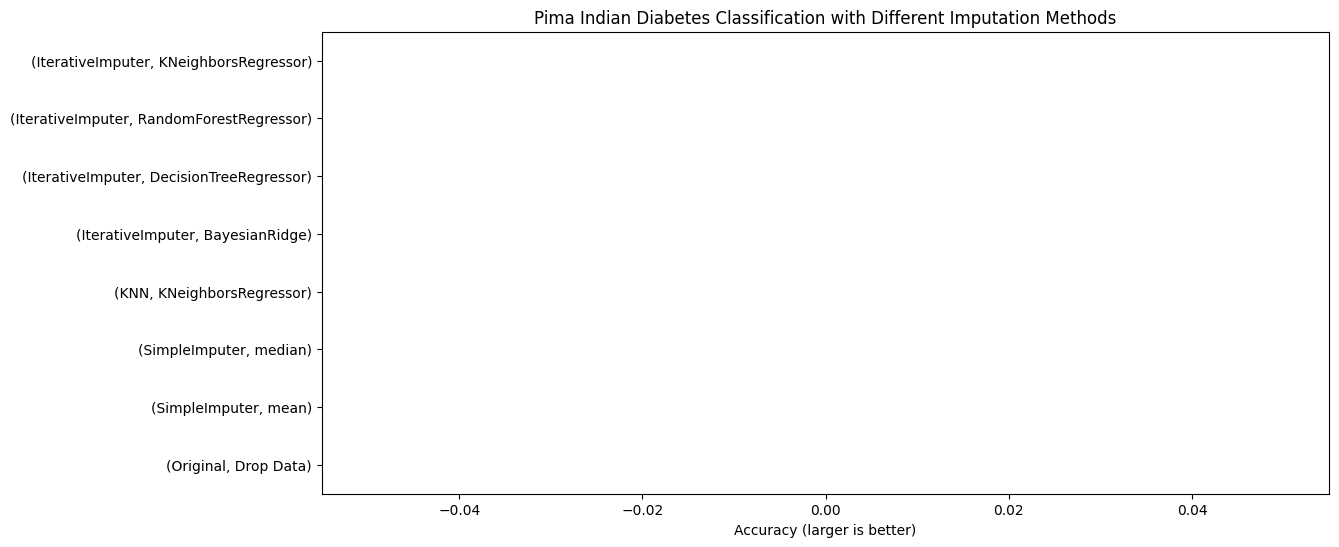

In [ ]:
# plot results
fig, ax = plt.subplots(figsize=(13, 6))
scores.plot.box(showmeans=True, vert=False, ax=ax)
ax.set_title('Pima Indian Diabetes Classification with Different Imputation Methods')
ax.set_xlabel('Accuracy (larger is better)')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=0)

missing_mask = X_train == 0

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)

imputer.fit(X_train)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_imputed, Y_train)

Y_pred = rf_regressor.predict(X_test_imputed)

acc = r2_score(Y_test,Y_pred)

print(f"Accuracy of Random Forest Regressor: {acc}")

Accuracy of Random Forest Regressor: 0.9990659219723044


Exercise 3

In [ ]:
abalone_knnn = X.describe()
Xf = abalone.drop(columns=['Rings'])
Yf = abalone[['Rings']]
Xm = X.mean()
Xs = X.std()
X = (X-X.mean())/X.std()
neighbors=5

Xt = KNNImputer(n_neighbors=5).fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=0)
Y_train['Rings'] = Y_train['Rings'].astype(int)
Y_test['Rings'] = Y_test['Rings'].astype(int)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
acc = accuracy_score(Y_test,Y_pred)

print('Imputation using k-Nearest Neighbours', neighbors)
print('Testing score is %5.3f' % acc)

Imputation using k-Nearest Neighbours 5
Testing score is 0.256


In [ ]:
abalone_knnn = X.describe()
Xf = abalone.drop(columns=['Rings'])
Yf = abalone[['Rings']]
Xm = X.mean()
Xs = X.std()
X = (X-X.mean())/X.std()
neighbors=10

Xt = KNNImputer(n_neighbors=10).fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=0)
Y_train['Rings'] = Y_train['Rings'].astype(int)
Y_test['Rings'] = Y_test['Rings'].astype(int)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
acc = accuracy_score(Y_test,Y_pred)

print('Imputation using k-Nearest Neighbours', neighbors)
print('Testing score is %5.3f' % acc)

Imputation using k-Nearest Neighbours 10
Testing score is 0.256


In [ ]:
abalone_knnn = X.describe()
Xf = abalone.drop(columns=['Rings'])
Yf = abalone[['Rings']]
Xm = X.mean()
Xs = X.std()
X = (X-X.mean())/X.std()
neighbors=15

Xt = KNNImputer(n_neighbors=15).fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=0)
Y_train['Rings'] = Y_train['Rings'].astype(int)
Y_test['Rings'] = Y_test['Rings'].astype(int)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
acc = accuracy_score(Y_test,Y_pred)

print('Imputation using k-Nearest Neighbours', neighbors)
print('Testing score is %5.3f' % acc)

Imputation using k-Nearest Neighbours 15
Testing score is 0.256


In [ ]:
abalone_knnn = X.describe()
Xf = abalone.drop(columns=['Rings'])
Yf = abalone[['Rings']]
Xm = X.mean()
Xs = X.std()
X = (X-X.mean())/X.std()
neighbors=20

Xt = KNNImputer(n_neighbors=20).fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=0)
Y_train['Rings'] = Y_train['Rings'].astype(int)
Y_test['Rings'] = Y_test['Rings'].astype(int)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
acc = accuracy_score(Y_test,Y_pred)

print('Imputation using k-Nearest Neighbours', neighbors)
print('Testing score is %5.3f' % acc)

Imputation using k-Nearest Neighbours 20
Testing score is 0.256
